In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
print('Shape of the dataframe is: ' ,df.shape)

Shape of the dataframe is:  (13320, 9)


In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [ ]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df["size"].replace({"4 Bedroom": "4 BHK", 
                    "6 Bedroom": "6 BHK",
                   "3 Bedroom" : "3 BHK",
                   "1 Bedroom" : "1 BHK",
                   "1 RK" : "1 BHK",
                   '8 Bedroom' : '8 BHK',
                   '2 Bedroom': '2 BHK',
                   '7 Bedroom': '7 BHK',
                   '5 Bedroom' : '5 BHK',
                   '9 Bedroom': '9 BHK',
                   '10 Bedroom': '10 BHK',
                   '11 Bedroom': '11 BHK',
                   '43 Bedroom': '43 BHK',
                   '12 Bedroom': '12 BHK',
                   '18 Bedroom': '18 BHK'}, inplace=True)

In [ ]:
dict = {}
for x in list(df.columns):
    dict[x] = df[x].value_counts().shape[0]

pd.DataFrame(dict, index=["Unique Counts"]).transpose()

,Unique Counts
area_type,4
availability,81
location,1305
size,19
society,2688
total_sqft,2117
bath,19
balcony,4
price,1994


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes(include = 'float64').columns
num_cols 

Index(['bath', 'balcony', 'price'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



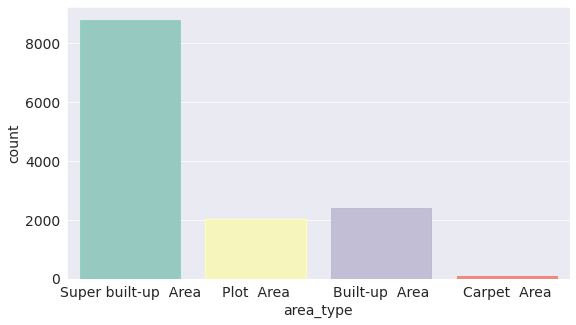

In [ ]:
sns.countplot(df.area_type,
              palette = 'Set3',
              edgecolor=sns.color_palette("Set3", 4))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



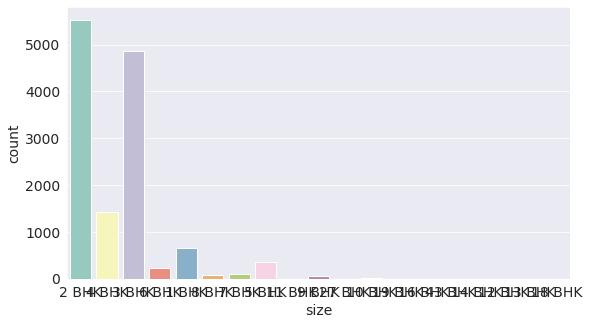

In [ ]:
sns.countplot(df['size'],
              palette = 'Set3')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



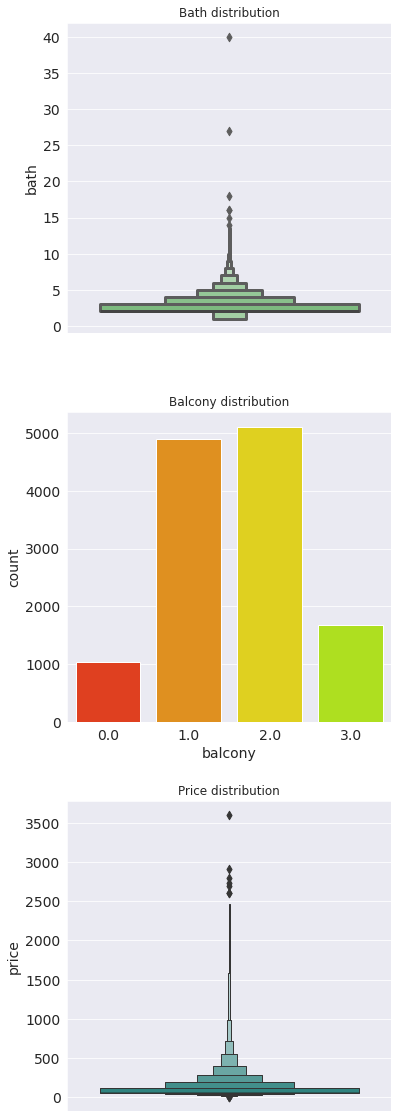

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(6,16))

sns.set_theme(style="darkgrid")
axes[0].set_title("Bath distribution")
axes[1].set_title("Balcony distribution")
axes[2].set_title("Price distribution")

sns.boxenplot(y=df.bath,
            palette='Greens', 
            color='red',
           linewidth=3,
           ax=axes[0]);

sns.countplot(df.balcony,
              palette = 'prism',
             ax = axes[1])

sns.boxenplot(y=df.price,
            palette='viridis',
           linewidth=1,
              ax=axes[2])

plt.tight_layout(pad=2)

In [ ]:
num_cols

Index(['bath', 'balcony', 'price'], dtype='object')

In [ ]:
df.shape

(13320, 9)

In [ ]:
px.histogram(df.sample(10000), 
           title='bath vs price',
           x='bath', 
           y='price')

In [ ]:
px.histogram(df.sample(10000), 
           title='balcony vs price',
           x='balcony', 
           y='price')

In [ ]:
px.histogram(df.sample(10000), 
           title='bath vs balcony',
           x='bath', 
           y='balcony')